<h1>Statistical Analysis</h3>

<h2>Load Data</h2>

<h2>Median Values per Respondent</h2>

In [3]:
import pandas as pd

# Load data
file_path = './datasets/merged_data_march_9_2024.csv'
merged_data_from_file = df = pd.read_csv(file_path, low_memory=False)

merged_data_from_file.head()

,Unnamed: 0.1,Unnamed: 0,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,...,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent,Grade,Grade Group
0,0,1,36109.900,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
1,1,3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
2,2,5,36301.000,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
3,3,7,36333.000,0.126290,0.188413,0.023834,0.126583,0.024996,0.126124,0.055529,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
4,4,9,36371.192,0.126344,0.188792,0.023866,0.126641,0.024909,0.126202,0.055519,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55


In [6]:
import pandas as pd
import numpy as np

columns_to_average = ['Anger', 'Contempt',
       'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement',
       'Sentimentality', 'Confusion',
       'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Grade'] 

# Calculate the mean for the specified columns for each respondent
median_values_per_respondent = merged_data_from_file.groupby('Respondent')[columns_to_average].median()

# Reset the index so 'respondent' becomes a column again, if desired
median_values_per_respondent.reset_index(inplace=True)

# Your new DataFrame is ready
print(median_values_per_respondent)


    Respondent     Anger  Contempt   Disgust      Fear       Joy   Sadness  \
0            1  0.248668  0.187858  0.031074  0.237259  0.025276  0.125741   
1            2  0.829258  0.192011  0.455749  0.700666  0.024112  0.127306   
2            3  0.973868  0.186968  0.234533  0.939516  0.024859  0.126353   
3            4  1.128400  0.194867  0.542712  0.756943  0.024230  0.127974   
4            5  0.178068  0.241761  0.030377  0.150610  0.026541  0.146868   
5            6  1.188999  0.464405  0.066129  0.736057  0.024306  0.523462   
6            7  1.113947  0.189137  0.574828  0.945523  0.024571  0.120660   
7           11  0.182226  0.192793  0.032798  0.169181  0.024713  0.131576   
8           12  0.131907  0.193971  0.024517  0.133346  0.024250  0.127979   
9           13  0.303975  0.192552  0.093231  0.255305  0.024305  0.128373   
10          14  0.230176  0.190745  0.065514  0.179325  0.025880  0.127182   
11          15  0.228550  0.195544  0.047102  0.160681  0.024415

<h3>Correlation between grade and features</h3>

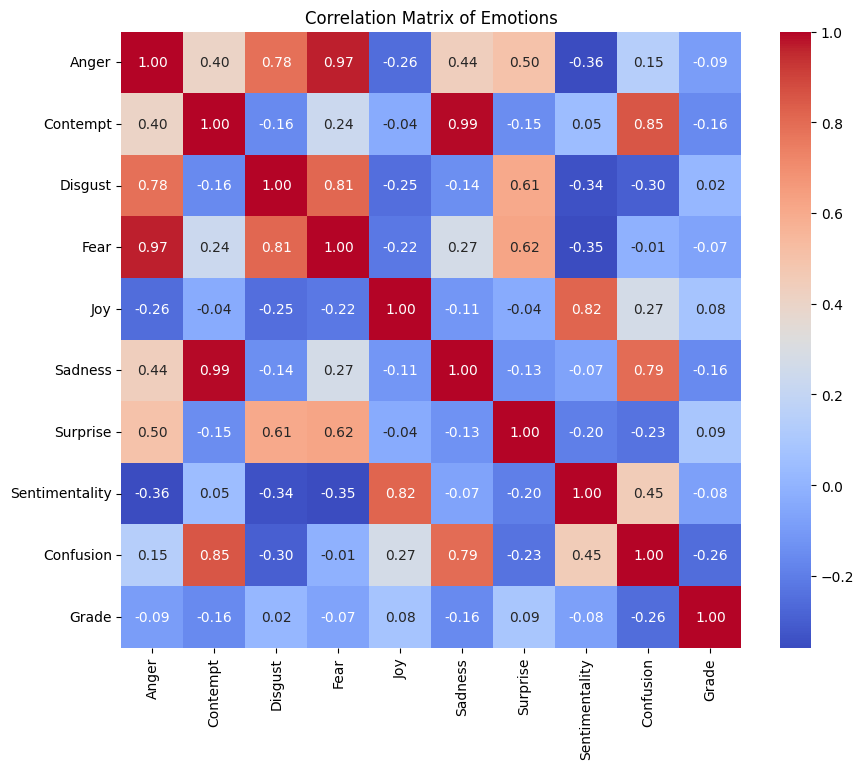

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_columns_df = median_values_per_respondent[['Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion','Grade']]

correlation_matrix = selected_columns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Emotions')
plt.show()


<h2>Linear Regression for Specific Emotions</h2>

In [9]:
# Add 'grade_group' column based on the 'grade' column values
median_values_per_respondent['Grade Group'] = median_values_per_respondent['Grade'].apply(
    lambda x: 'Below or Equals 55' if x <= 55 else 'Above 55'
)

median_values_per_respondent.head()

,Respondent,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,...,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Blink,BlinkRate,Grade,Grade Group
0,1,0.248668,0.187858,0.031074,0.237259,0.025276,0.125741,0.077228,0.609120,0.103539,...,0.008324,5.406527,0.192341,0.336362,0.000000,0.042303,0.0,18.0,100.0,Above 55
1,2,0.829258,0.192011,0.455749,0.700666,0.024112,0.127306,0.085343,51.227924,0.005822,...,0.127819,79.332996,0.052340,0.002463,0.002581,0.025061,0.0,6.0,50.0,Below or Equals 55
2,3,0.973868,0.186968,0.234533,0.939516,0.024859,0.126353,0.298814,28.450745,0.081968,...,0.012748,73.760490,0.009846,0.119109,0.064721,0.011012,0.0,0.0,55.0,Below or Equals 55
3,4,1.128400,0.194867,0.542712,0.756943,0.024230,0.127974,0.059687,59.309982,0.015777,...,0.148284,92.948799,0.037360,0.027083,0.057503,0.055408,0.0,18.0,75.0,Above 55
4,5,0.178068,0.241761,0.030377,0.150610,0.026541,0.146868,0.055757,0.475313,0.687858,...,0.152524,0.590741,0.337578,0.524537,1.695253,0.409629,0.0,12.0,65.0,Above 55


<h2>Statistical Describe</h2>

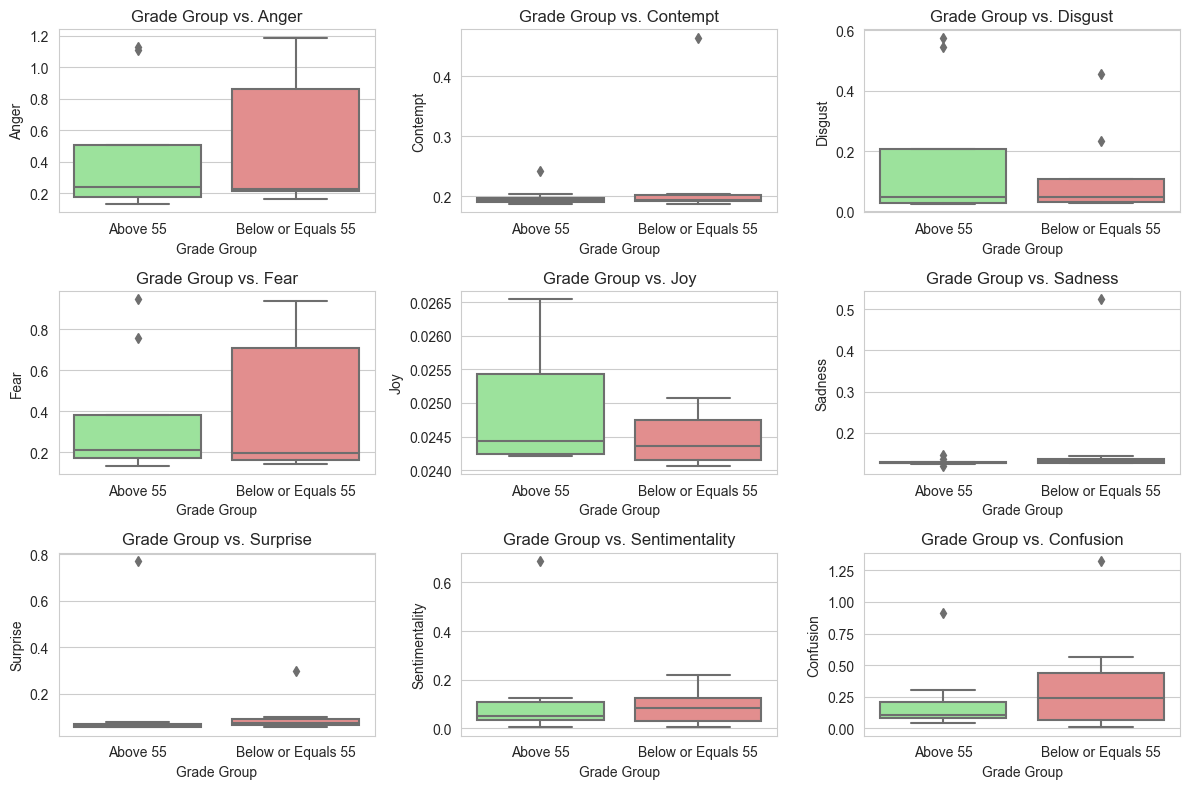

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette("deep") 

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# List of emotions you want to plot
emotions = ['Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion']

palette = {"Below or Equals 55": "lightcoral", "Above 55": "lightgreen"}

for i, emotion in enumerate(emotions, 1):
    plt.subplot(3, 3, i)  # Creates a grid of 2x2 and fills position i
    sns.boxplot(x='Grade Group', y=emotion, data=median_values_per_respondent, palette=palette)
    plt.title(f'Grade Group vs. {emotion}')

plt.tight_layout()
plt.show()


<h5>
A box plot (or box-and-whisker plot) is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. Here’s how to interpret a box plot:

Components of a Box Plot:
Central Box: The box spans from the first quartile (Q1) to the third quartile (Q3). This region, known as the interquartile range (IQR), contains the middle 50% of the data. The length of the box indicates the degree of spread in the middle half of the data; a longer box means a larger spread.

Median (Middle Line): A line within the box marks the median (Q2) of the dataset, dividing the box into two parts. The median represents the middle value when the data are sorted.

Whiskers: Lines extending from the box (the "whiskers") indicate variability outside the upper and lower quartiles, hence they cover the total spread of the data. The ends of the whiskers represent the minimum and maximum values within 1.5 times the IQR from the Q1 and Q3, respectively.

Outliers: Data points beyond the whiskers are often plotted individually as small dots. These points are considered outliers since they lie beyond 1.5 times the IQR from the quartiles. 

<h3>Describe AUs</h3>

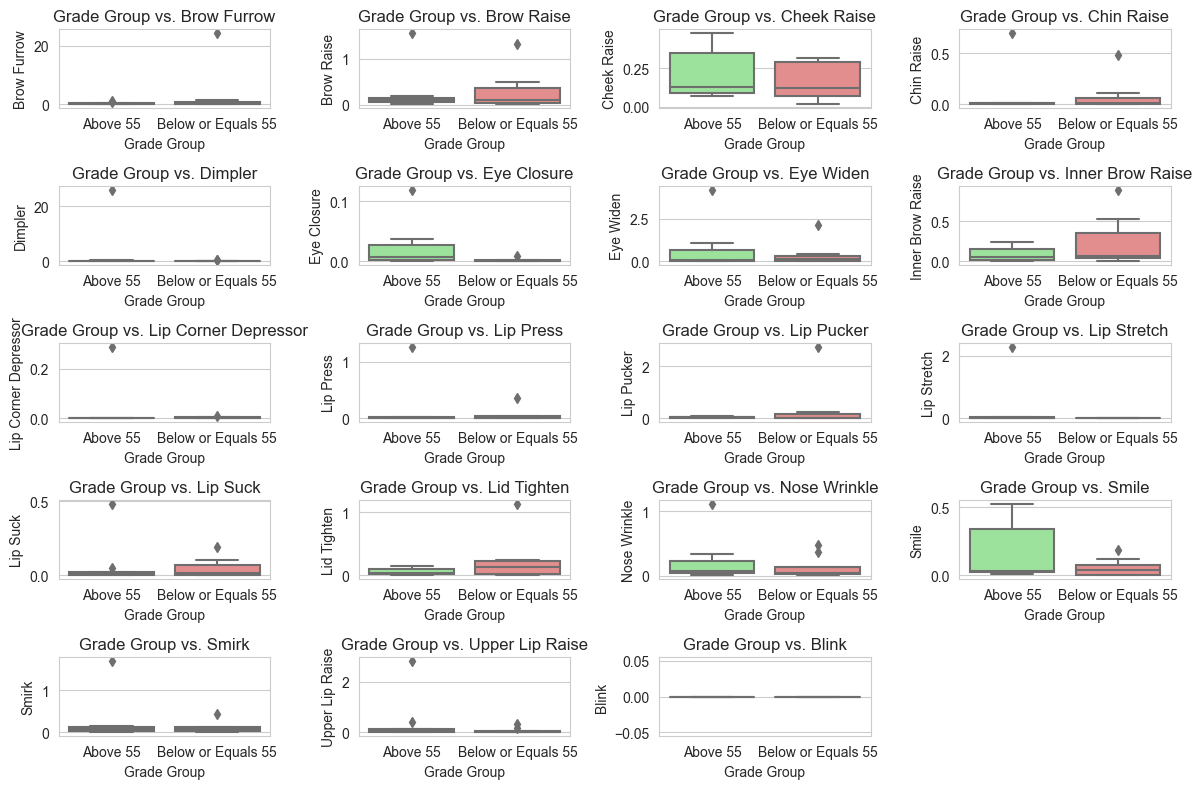

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette("deep") 

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# List of emotions you want to plot
emotions = ['Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Lip Corner Depressor',
       'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten',
       'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink']

palette = {"Below or Equals 55": "lightcoral", "Above 55": "lightgreen"}

for i, emotion in enumerate(emotions, 1):
    plt.subplot(5, 4, i)  # Creates a grid of 2x2 and fills position i
    sns.boxplot(x='Grade Group', y=emotion, data=median_values_per_respondent, palette=palette)
    plt.title(f'Grade Group vs. {emotion}')

plt.tight_layout()
plt.show()


<h2>Statistical Significancy Test</h2>

In [14]:
from scipy import stats
import pandas as pd


# Selected columns for the Shapiro-Wilk test
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion']

# Perform Shapiro-Wilk test for each selected column
shapiro_results = {}
for column in selected_columns:
    stat, p = stats.shapiro(median_values_per_respondent[column])
    shapiro_results[column] = {'Statistics': stat, 'p-value': p}

shapiro_results


{'Anger': {'Statistics': 0.716744065284729, 'p-value': 0.00025964027736335993},
 'Contempt': {'Statistics': 0.39901167154312134,
  'p-value': 3.4405240967316786e-07},
 'Disgust': {'Statistics': 0.6465450525283813,
  'p-value': 4.6077904698904604e-05},
 'Fear': {'Statistics': 0.7248943448066711, 'p-value': 0.00032170844497159123},
 'Joy': {'Statistics': 0.8039252758026123, 'p-value': 0.0030722578521817923},
 'Sadness': {'Statistics': 0.3285646438598633,
  'p-value': 1.0809565509362073e-07},
 'Surprise': {'Statistics': 0.4341246485710144,
  'p-value': 6.326836228254251e-07},
 'Sentimentality': {'Statistics': 0.6163383722305298,
  'p-value': 2.3181062715593725e-05},
 'Confusion': {'Statistics': 0.7407238483428955,
  'p-value': 0.0004922606749460101}}

<h5>According to the Shapiro-Wilk test results, all emotions are not normally distributed. Therefore, the Mann-Whitney U Test (also known as the Wilcoxon Rank-Sum Test) will be used to compare the 2 grade groups.

In [15]:
from scipy.stats import mannwhitneyu

# Function to perform Mann-Whitney U test on specified columns for two grade groups
def perform_mannwhitneyu_test(dataframe, grade_group_column, grade_group1, grade_group2, columns_to_compare):
    results = {}
    for column in columns_to_compare:
        # Splitting the data into two groups based on the grade group
        group1 = dataframe[dataframe[grade_group_column] == grade_group1][column]
        group2 = dataframe[dataframe[grade_group_column] == grade_group2][column]

        # Performing the Mann-Whitney U test
        u_stat, p_value = mannwhitneyu(group1, group2)
        
        # Storing the results
        results[column] = {'U statistic': u_stat, 'P-value': p_value}
    
    return results


columns_to_compare = ['Anger', 'Contempt', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Confusion', 'Sentimentality']
test_results = perform_mannwhitneyu_test(median_values_per_respondent, 'Grade Group', 'Below or Equals 55', 'Above 55', columns_to_compare)

# Printing the test results
for column, result in test_results.items():
    print(f"{column}: U statistic = {result['U statistic']}, P-value = {result['P-value']}")



Anger: U statistic = 33.0, P-value = 0.959129759129759
Contempt: U statistic = 38.0, P-value = 0.5737373737373737
Disgust: U statistic = 33.0, P-value = 0.959129759129759
Fear: U statistic = 30.0, P-value = 0.8784770784770783
Joy: U statistic = 23.0, P-value = 0.3822843822843822
Sadness: U statistic = 40.0, P-value = 0.4418026418026417
Surprise: U statistic = 45.0, P-value = 0.19487179487179485
Confusion: U statistic = 36.0, P-value = 0.7209013209013208
Sentimentality: U statistic = 31.0, P-value = 0.959129759129759
